# Introduction to Computer Vision with OpenCV, YOLOv11, and Stable Diffusion


## Objectives

- Understand the basics of OpenCV and image handling in Python  
- Apply common image filters with OpenCV  
- Perform real‑time object detection with **YOLOv11**  
- Generate images from text prompts using **Stable Diffusion 3** via the **Diffusers** library  


[![Open in Colab‑GPU](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/i-zeeshan-afzal/cv-intro/blob/master/intro_computer_vision.ipynb?accelerator=GPU)


In [1]:

# 🛠️ Setup (uncomment to run in a fresh environment)
# Note: A CUDA‑enabled GPU is strongly recommended for YOLOv11 and Stable Diffusion.
!pip install opencv-python ultralytics diffusers transformers accelerate torch torchvision matplotlib pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

## 1. Basic Introduction to OpenCV

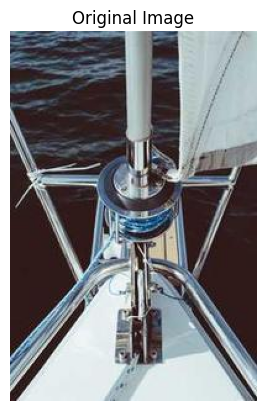

In [5]:

import cv2
import urllib
import matplotlib.pyplot as plt
import numpy as np

# Load an example image
req = urllib.request.urlopen('https://picsum.photos/200/300.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
if img is None:
    raise FileNotFoundError("Please place an image named 'sample.jpg' in the notebook directory or edit the path.")

# Convert BGR (OpenCV default) to RGB for Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()


OpenCV loads images in **BGR** order. We converted to **RGB** here so the colors display correctly in Matplotlib.

## 2. Image Filtering with OpenCV

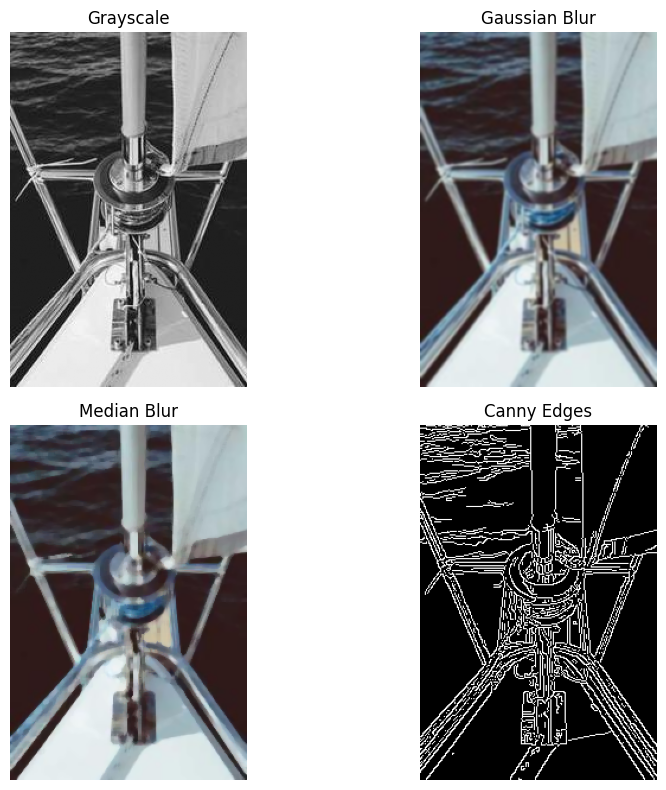

In [6]:

# Apply common filters
gray   = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur   = cv2.GaussianBlur(img_rgb, (5, 5), 0)
median = cv2.medianBlur(img_rgb, 5)
edges  = cv2.Canny(img, 100, 200)

# Display results
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
ax[0, 0].imshow(gray, cmap='gray');  ax[0, 0].set_title('Grayscale');     ax[0, 0].axis('off')
ax[0, 1].imshow(blur);              ax[0, 1].set_title('Gaussian Blur'); ax[0, 1].axis('off')
ax[1, 0].imshow(median);            ax[1, 0].set_title('Median Blur');    ax[1, 0].axis('off')
ax[1, 1].imshow(edges, cmap='gray');ax[1, 1].set_title('Canny Edges');    ax[1, 1].axis('off')
plt.tight_layout()


The filters above demonstrate noise reduction (`GaussianBlur`, `medianBlur`) and edge detection (`Canny`). Experiment with kernel sizes and thresholds!

## 3. Object Detection with YOLOv11

100%|██████████| 5.35M/5.35M [00:00<00:00, 109MB/s]


100%|██████████| 123k/123k [00:00<00:00, 7.99MB/s]


image 1/1 /content/dogs.jpg: 448x640 2 dogs, 45.0ms
Speed: 7.4ms preprocess, 45.0ms inference, 324.1ms postprocess per image at shape (1, 3, 448, 640)


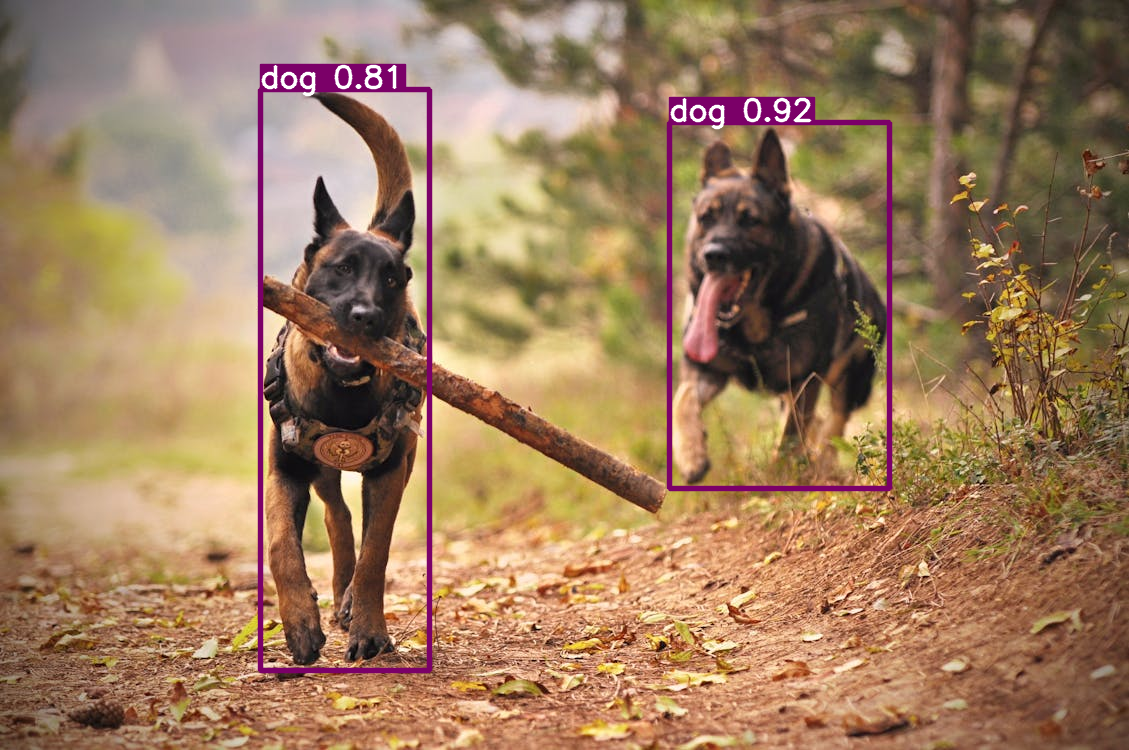

In [10]:

from ultralytics import YOLO

# Load a pretrained YOLOv11n model (nano variant for speed)
model = YOLO('yolo11n.pt')  # Automatically downloads weights the first time

results = model('https://i.ibb.co/RcTXr5Y/dogs.jpg')
results[0].show()



* `results` contains predicted bounding boxes, confidence scores, and class labels.  
* Try different model variants like `yolov11s.pt`, `yolov11m.pt`, or the high‑accuracy `yolov11x.pt`.  
* To run on video streams, simply pass a video file path or a webcam index (e.g., `0`) to `model()`.  


## 4. Text‑to‑Image Generation with Stable Diffusion 3

In [ ]:

import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'
pipe = StableDiffusionPipeline.from_pretrained(
    'stabilityai/stable-diffusion-3-base',
    torch_dtype=torch.float16 if device == 'cuda' else torch.float32
).to(device)

prompt = "A futuristic cityscape at dusk, cinematic, ultra realistic"
image = pipe(prompt, num_inference_steps=30, guidance_scale=8.0).images[0]

plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis('off')
plt.title(prompt)
plt.show()



> **Tip:** For lower‑memory GPUs you can enable *memory‑efficient attention* with `pipe.enable_model_cpu_offload()` or use a quantized checkpoint such as **SD3‑Medium‑Turbo**.



## 5. Next Steps

- Fine‑tune **YOLOv11** on your own dataset with `model.train(data='data.yaml')`  
- Experiment with different Stable Diffusion models (`sd3.5`, `sdxl`) and creative prompts  
- Combine detection and generation: detect objects, then inpaint or replace them with Stable Diffusion!  

---

### References

- [Ultralytics YOLOv11 Documentation](https://docs.ultralytics.com/models/yolo11/)  
- [Hugging Face **Diffusers** Library](https://github.com/huggingface/diffusers)  
- [Stable Diffusion 3 Announcement](https://huggingface.co/blog/sd3)  
